# Import the Library 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Import the dataset and get the information 


In [3]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Data_Credit = pd.read_csv('/content/drive/MyDrive/Colab/Credit_Card/creditcard dataset.csv')
Data_Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Data_Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA


In [6]:
# see the values of number of the class 
Data_Credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# percentage of the class  
percentage_fraud = (Data_Credit[Data_Credit['Class']==1].shape[0]/Data_Credit['Class'].shape[0])*100
percentage_Nofraud = (Data_Credit[Data_Credit['Class']==0].shape[0]/Data_Credit['Class'].shape[0])*100
print (f"the percentage of fraud detection is  {percentage_fraud}")
print (f"he percentage of the sucessfull operation is  : {percentage_Nofraud}")

the percentage of fraud detection is  0.1727485630620034
he percentage of the sucessfull operation is  : 99.82725143693798


Text(0, 0.5, 'Counts Number ')

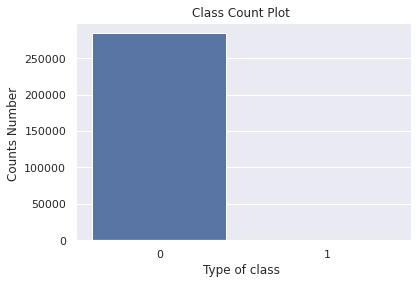

In [8]:
sns.countplot(Data_Credit['Class'])
plt.title("Class Count Plot ")
plt.xlabel("Type of class ")
plt.ylabel("Counts Number ")

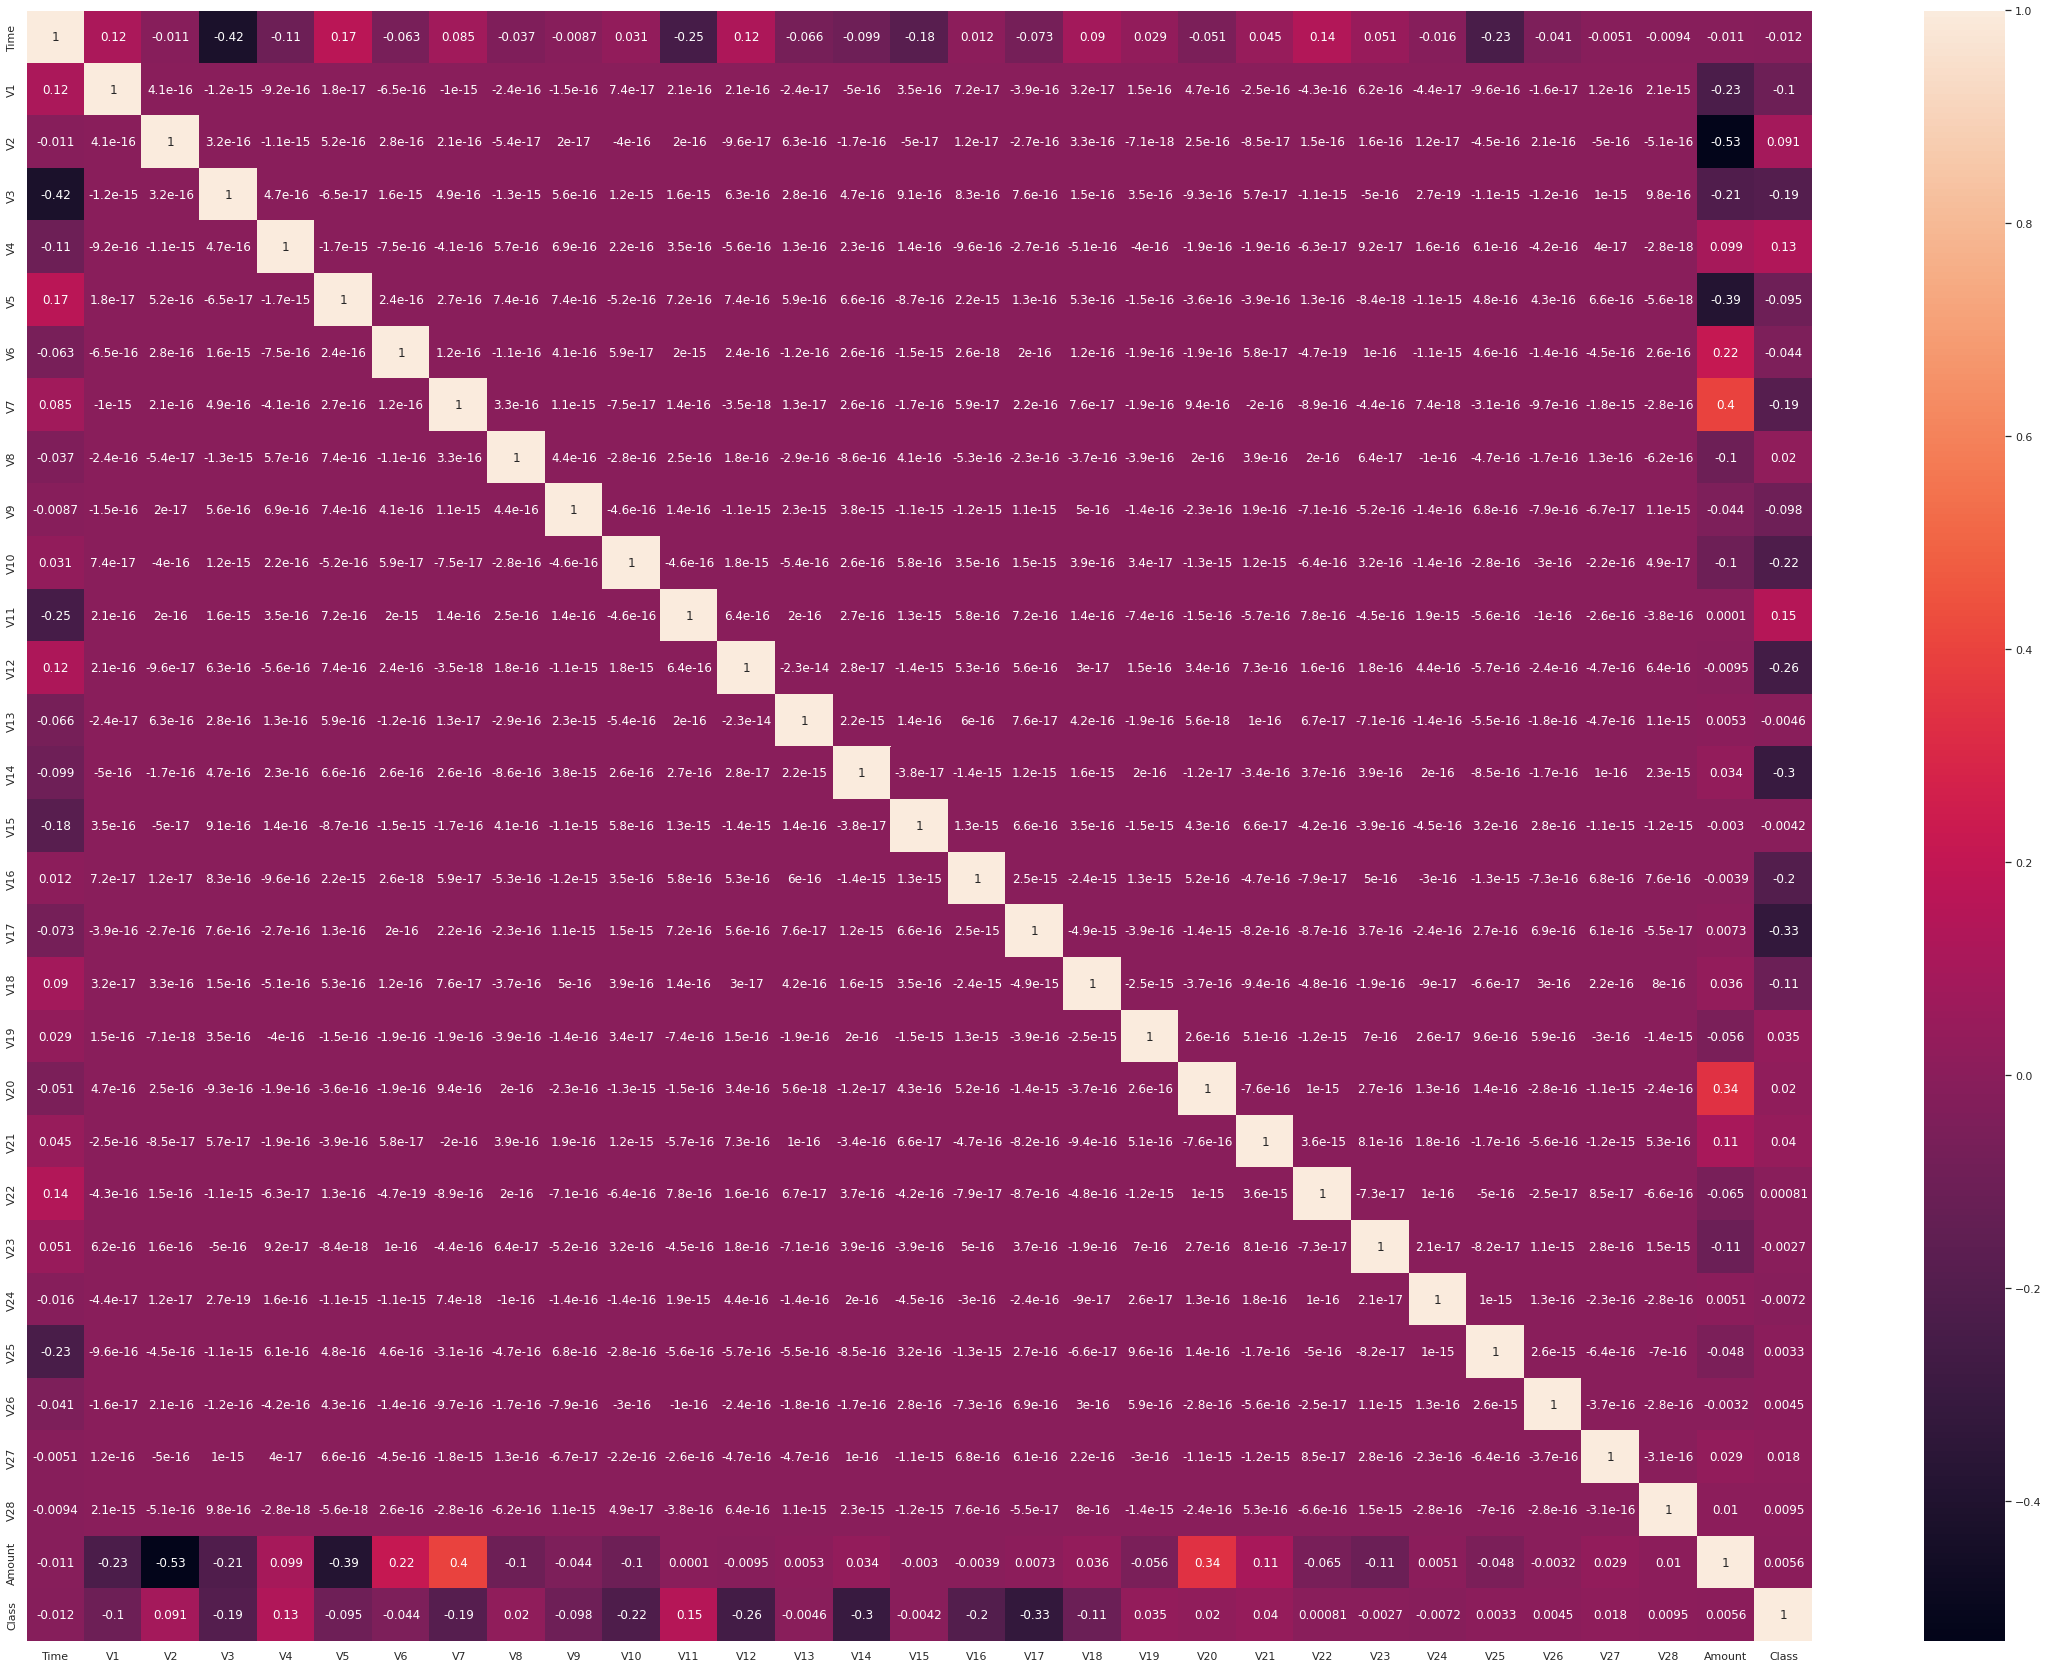

In [9]:
plt.figure(figsize=(40,30))
sns.heatmap(Data_Credit.corr(),annot=True)

In [10]:
corr = Data_Credit.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


# Spliting the Dataset 

In [11]:
#split the data set to the features and label 
y= Data_Credit['Class']
x= Data_Credit.drop(['Class','Time'] ,axis =1)

In [12]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
# library of split to train and the test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=0)

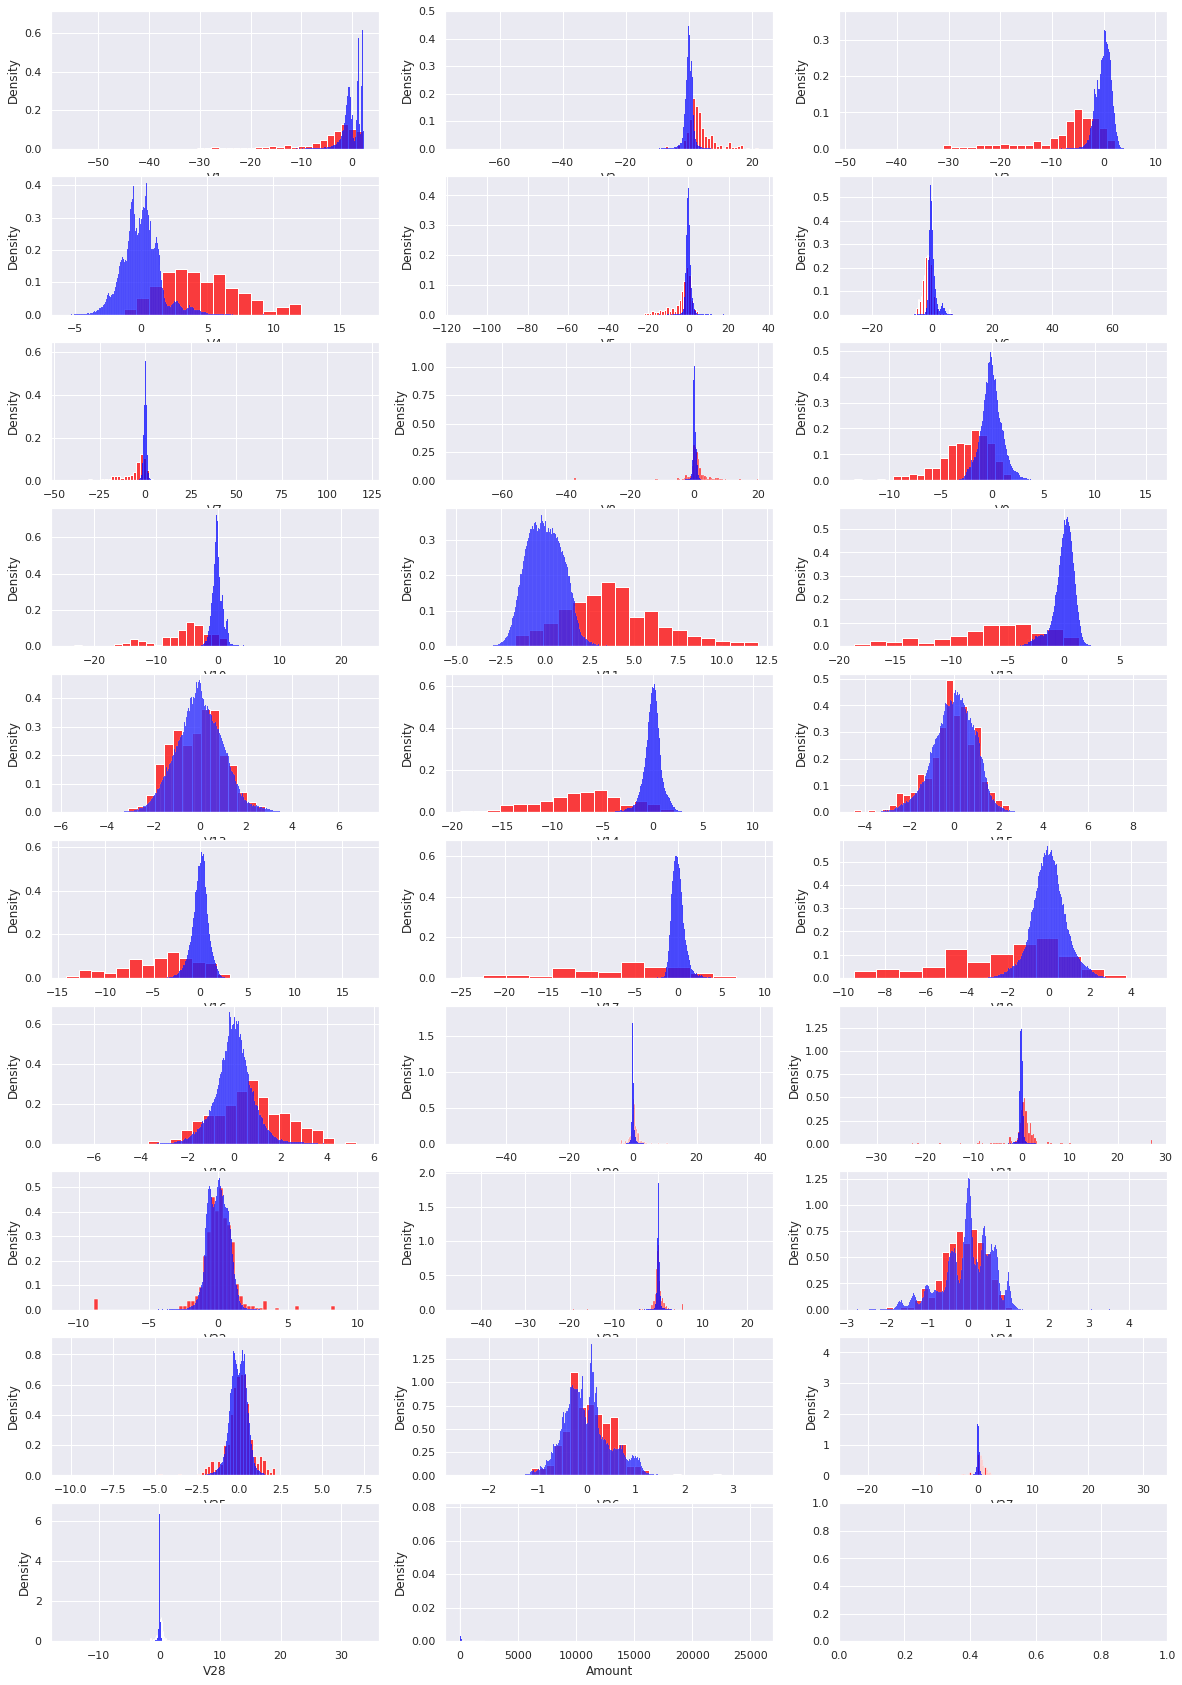

In [14]:
Feature = list(x.columns.values)
fig , axes = plt.subplots(10,3,figsize=(20, 30))
Row = 0 
col =0 
for Index ,Feat in enumerate(Feature): 
  sns.histplot(x[Feat][Data_Credit['Class']==1],stat='density',ax=axes[Row,col],color='red')
  sns.histplot(x[Feat][Data_Credit['Class']==0],stat='density',ax=axes[Row,col],color='blue')
  col+=1 
  if col == 3 : 
    Row+=1
    col=0

plt.show()



# Machine Learning 

## Confusion Matrix : 
- True Positive : obs : Positive , Class_Model : Positive
- True Negative : obs : Negative , Class_Model : Negative
- False Positive: obs : Negative , Class_Model : Positive
- False Negative: obs : Positive , Class_Model : Negative


In [15]:
'''
Implement one Funcion : 
                        1- Confusion_Matrix

'''

from sklearn.metrics import confusion_matrix 


'''
Argument of Confusion_Matrix : 
                              1-y_test : is the test of dataset
                              2-y_pred L is the predicted output from model 
                              3-title : the title of heatmap
                              4-Positive_term : term (1)
                              5-Negative_term : term (0)
'''
def Confusion_Matrix (y_test , y_Pred ,title,Positive_term, Negative_term): 
  # confusion matrix 
  Conf_Mat  = confusion_matrix(y_test , y_Pred)

  Con_Plot = sns.heatmap(Conf_Mat , annot =True , cmap='Blues')

  Con_Plot.set_title(title)
  Con_Plot.set_xlabel('\nPredicted Values')
  Con_Plot.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  Con_Plot.xaxis.set_ticklabels([Positive_term,Negative_term])
  Con_Plot.yaxis.set_ticklabels([Positive_term,Negative_term])

  ## Display the visualization of the Confusion Matrix.
  plt.show()



# Get metrics function 

In [16]:
from sklearn import metrics 
def Get_metrics (y_test , y_pred):
  accuracy = metrics.accuracy_score (y_test , y_pred)

  recall = metrics.recall_score(y_test , y_pred)

  prescision = metrics.precision_score(y_test , y_pred)

  f1_score = metrics.f1_score(y_test , y_pred)

  return accuracy , recall , prescision ,f1_score

## ROC Function 


In [17]:

from sklearn.metrics import roc_curve

def ROC (y_test,y_pred_proba): 
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

  plt.figure(figsize=(6,4))

  plt.plot(fpr, tpr, linewidth=2)

  plt.plot([0,1], [0,1], 'k--' )

  plt.rcParams['font.size'] = 12

  plt.title('ROC curve for RainTomorrow classifier')

  plt.xlabel('False Positive Rate (1 - Specificity)')

  plt.ylabel('True Positive Rate (Sensitivity)')

  plt.show()


## Embalaced Data

In [18]:
# imbalaced Data 
from sklearn.datasets import make_classification
from collections import Counter

print(Counter(y))

Counter({0: 284315, 1: 492})


In [19]:
from imblearn.over_sampling import RandomOverSampler
def Embalaced_Function(x_train,y_train):
  Emb = RandomOverSampler (random_state = 0) 
  x_train_emb , y_train_emb = Emb.fit_resample(x_train,y_train)
  return x_train_emb , y_train_emb

## KFold 

In [20]:
from sklearn.model_selection  import KFold 
kFlod = KFold(n_splits=5,random_state=0,shuffle=True)

In [21]:
# define the dataframe  
Data_Result = pd.DataFrame(columns=['Techique1','Techique2','Model','Recall','Precesion','F1_Score'])

## Classifications model 




In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from statistics import mean

'''
Techique1 : Select : 1- Cross_Val
                     2- NoCross_Val

Techique2 : Select : 1- Embalaced
                     2- NoEmbalaced

'''
def Classifcation_Model (Model , Techique1 , Techique2 , x_train , y_train, x_test, y_test ):
  global Data_Result

  if Model == "Logistic" : 
    Model_Sel = LogisticRegression(random_state=0)

  elif Model == "SVM" :
    Model_Sel = SVC() 
  elif Model == "KNN" :
    Model_Sel = KNeighborsClassifier()

  elif Model == "XGboost":
    Model_Sel = XGBClassifier ()
  
  elif Model == "Naive Bayes" :
    Model_Sel = GaussianNB()
  
  elif Model == "Decision Tree":
    Model_Sel = DecisionTreeClassifier()
  
  elif Model == "Random forest": 
    Model_Sel = RandomForestClassifier()
  else : 
    print ("Please enter the correct Model ....")
    return 1
  

  if Techique1 == 'Cross_Val' and  Techique2 == 'Embalaced' :
    x_emb , y_emb = Embalaced_Function(x , y)
    score_LRecall = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='recall')
    score_LPrecsion = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='precision')
    score_Lf1Score = cross_val_score (Model_Sel , x_emb ,y_emb ,cv=kFlod, scoring ='f1_micro')
    score_Recall =mean (score_LRecall)
    score_Precsion= mean(score_LPrecsion)
    score_f1Score = mean(score_Lf1Score)


  elif Techique1 == 'Cross_Val': 
    score_LRecall = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='recall')
    score_LPrecsion = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='precision')
    score_Lf1Score = cross_val_score (Model_Sel , x,y ,cv=kFlod, scoring ='f1_micro')
    score_Recall =mean (score_LRecall)
    score_Precsion= mean(score_LPrecsion)
    score_f1Score = mean(score_Lf1Score)

  elif Techique2 == 'Embalaced':
    x_train_emb , y_train_emb = Embalaced_Function(x_train , y_train)
    Model_Sel.fit(x_train_emb , y_train_emb)
    y_pred= Model_Sel.predict (x_test)
    _,score_Recall ,score_Precsion, score_f1Score =  Get_metrics (y_test , y_pred)
  
  else : 
    Model_Sel.fit(x_train , y_train)
    y_pred= Model_Sel.predict (x_test)
    _,score_Recall ,score_Precsion, score_f1Score = Get_metrics (y_test , y_pred)
   
  Data_Result = Data_Result.append(pd.DataFrame({'Techique1':Techique1,'Techique2':Techique2,'Model':Model,'Recall':score_Recall,'Precesion':score_Precsion,'F1_Score':score_f1Score},index=[0]))



## Logisic regression


In [23]:
# without cross validation and without Embalaced
Classifcation_Model ("Logistic" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Logistic" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# without cross validation and with Embalaced
Classifcation_Model ("Logistic" , "NoCross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )
# with cross validation and with Embalaced
Classifcation_Model ("Logistic" , "Cross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )


In [24]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199


## SVM

In [25]:
# without cross validation and without Embalaced
Classifcation_Model ("SVM" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

In [26]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370



## KNN



In [27]:
# without cross validation and without Embalaced
Classifcation_Model ("KNN" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("KNN" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# without cross validation and with Embalaced
Classifcation_Model ("KNN" , "NoCross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )

In [28]:
Data_Result.head(n=10)

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370
0,NoCross_Val,NoEmbalaced,KNN,0.659864,0.932692,0.772908
0,Cross_Val,NoEmbalaced,KNN,0.658230,0.918175,0.999301
0,NoCross_Val,Embalaced,KNN,0.748299,0.709677,0.728477


## XGboost

---



---




In [29]:
# without cross validation and without Embalaced
Classifcation_Model ("XGboost" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("XGboost" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# without cross validation and with Embalaced
Classifcation_Model ("XGboost" , "NoCross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )
# with cross validation and with Embalaced
Classifcation_Model ("XGboost" , "Cross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )

In [30]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370


## Naive Bayes


In [31]:
# without cross validation and without Embalaced
Classifcation_Model ("Naive Bayes" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Naive Bayes" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# without cross validation and with Embalaced
Classifcation_Model ("Naive Bayes" , "NoCross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )
# with cross validation and with Embalaced
Classifcation_Model ("Naive Bayes" , "Cross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )

In [32]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370


## Decision Tree

In [33]:
# without cross validation and without Embalaced
Classifcation_Model ("Decision Tree" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# with cross validation and without Embalaced
Classifcation_Model ("Decision Tree" , "Cross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )
# without cross validation and with Embalaced
Classifcation_Model ("Decision Tree" , "NoCross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )
# with cross validation and with Embalaced
Classifcation_Model ("Decision Tree" , "Cross_Val" , "Embalaced" , x_train , y_train, x_test, y_test )

In [34]:
Data_Result.head()

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370


## Random forest

In [35]:
# without cross validation and without Embalaced
Classifcation_Model ("Random forest" , "NoCross_Val" , "NoEmbalaced" , x_train , y_train, x_test, y_test )

In [37]:
Data_Result.head(n=20)

,Techique1,Techique2,Model,Recall,Precesion,F1_Score
0,NoCross_Val,NoEmbalaced,Logistic,0.605442,0.881188,0.717742
0,Cross_Val,NoEmbalaced,Logistic,0.617087,0.867449,0.999171
0,NoCross_Val,Embalaced,Logistic,0.911565,0.068020,0.126594
0,Cross_Val,Embalaced,Logistic,0.919533,0.973396,0.947199
0,NoCross_Val,NoEmbalaced,SVM,0.360544,0.828125,0.502370
0,NoCross_Val,NoEmbalaced,KNN,0.659864,0.932692,0.772908
0,Cross_Val,NoEmbalaced,KNN,0.658230,0.918175,0.999301
0,NoCross_Val,Embalaced,KNN,0.748299,0.709677,0.728477
0,NoCross_Val,NoEmbalaced,XGboost,0.761905,0.925620,0.835821
0,Cross_Val,NoEmbalaced,XGboost,0.782815,0.909019,0.999487


# conclusion 
- in this data set, we interset the recall metric 
- After apply model, we descsion apply decision tree  